### Random Forest Classifier Model

Prediction of whether an employee has an intention to leave his/her employer. 

Predictor variables (numeric) : YrsCurEmp, NumChild, Stress, Age, Promo, OpProc, Supvr

Predictor variables (categorical) : HseCare, Edu, GenDis, EthDis, MissFamAct, PaidFair, EmpBft, EnjCo, InfByOth

Response variable : ChgEmp 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import essential models and functions from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.tree import plot_tree

In [3]:
# Importing data
df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,HseCare,Edu,ChgEmp,GenDis,EthDis,MissFamAct,PaidFair,EmpBft,EnjCo,InfByOth,YrsCurEmp,NumChild,Stress,Age,Promo,OpProc,Supvr,IntLvEmp
0,0,Equal Responsibility,Bachelor Degree,Agree,Strongly Disagree,Strongly Disagree,Moderately Disagree,Strongly Disagree,Moderately Agree,Moderately Agree,Disagree,17,2,1.50,42,8,10,12,2.67
1,1,Mostly My Responsibility,Bachelor Degree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Slightly Disagree,Strongly Disagree,Disagree,2,0,1.17,63,4,8,9,2.83
2,2,Equal Responsibility,Doctorate,Disagree,Slightly Disagree,Moderately Disagree,Slightly Agree,Strongly Agree,Slightly Disagree,Strongly Agree,Disagree,2,0,1.83,35,10,11,12,1.67
3,3,All My Responsibility,Associate Degree,Disagree,Strongly Disagree,Strongly Disagree,Moderately Disagree,Strongly Agree,Slightly Disagree,Slightly Agree,Disagree,21,0,4.17,58,6,10,10,2.33
4,4,Mostly My Responsibility,Some college (No Degree),Agree,Moderately Agree,Strongly Disagree,Moderately Agree,Slightly Disagree,Slightly Disagree,Slightly Agree,Disagree,2,0,4.83,27,8,4,10,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,748,All My Responsibility,Master Degree,Disagree,Moderately Disagree,Strongly Disagree,Moderately Disagree,Moderately Agree,Strongly Agree,Strongly Agree,Disagree,1,0,1.00,29,12,11,10,1.67
749,749,Mostly Partner Responsibility,Bachelor Degree,Agree,Strongly Disagree,Strongly Disagree,Moderately Agree,Moderately Agree,Moderately Agree,Moderately Agree,Disagree,1,0,2.50,24,10,7,6,3.17
750,750,Equal Responsibility,Bachelor Degree,Agree,Moderately Disagree,Moderately Disagree,Moderately Agree,Slightly Agree,Slightly Agree,Slightly Agree,Agree,1,1,6.00,44,2,2,4,6.00
751,751,Equal Responsibility,Master Degree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Moderately Disagree,Strongly Disagree,Strongly Agree,Disagree,1,2,4.00,37,6,6,10,2.50


### Pre-processing of data

In [4]:
### Using One-Hot Encoding to change categorical variables to integerss for processing by Random Forest model

ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors 
df_cat = df[['HseCare', 'GenDis', 'EthDis', 'MissFamAct', 'PaidFair', 'EmpBft', 'EnjCo', 'Edu', 'InfByOth']]
ohe.fit(df_cat)
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), columns=ohe.get_feature_names_out(df_cat.columns))

# Check the encoded variables
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   HseCare_All My Responsibility          753 non-null    float64
 1   HseCare_All Partner Responsibility     753 non-null    float64
 2   HseCare_Equal Responsibility           753 non-null    float64
 3   HseCare_Mostly My Responsibility       753 non-null    float64
 4   HseCare_Mostly Partner Responsibility  753 non-null    float64
 5   HseCare_No Partner                     753 non-null    float64
 6   GenDis_Moderately Agree                753 non-null    float64
 7   GenDis_Moderately Disagree             753 non-null    float64
 8   GenDis_Slightly Agree                  753 non-null    float64
 9   GenDis_Slightly Disagree               753 non-null    float64
 10  GenDis_Strongly Agree                  753 non-null    float64
 11  GenDis

In [5]:
# Combining Numeric features with the OHE Categorical features
df_num = df[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr']]
df_res = df['ChgEmp']
df_ohe = pd.concat([df_num, df_cat_ohe, df_res], sort = False, axis = 1).reindex(index=df_num.index)

# Check the final dataframe
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YrsCurEmp                              753 non-null    int64  
 1   NumChild                               753 non-null    int64  
 2   Stress                                 753 non-null    float64
 3   Age                                    753 non-null    int64  
 4   Promo                                  753 non-null    int64  
 5   OpProc                                 753 non-null    int64  
 6   Supvr                                  753 non-null    int64  
 7   HseCare_All My Responsibility          753 non-null    float64
 8   HseCare_All Partner Responsibility     753 non-null    float64
 9   HseCare_Equal Responsibility           753 non-null    float64
 10  HseCare_Mostly My Responsibility       753 non-null    float64
 11  HseCar

In [6]:
# Check the ratio of the classes in 'ChgEmp'
df_ohe['ChgEmp'].value_counts()

Agree       509
Disagree    244
Name: ChgEmp, dtype: int64

In [7]:
# Balance the 'ChgEmp' response variable

# Upsample Disagree to match Agree
from sklearn.utils import resample

ChgEmpAgree = df_ohe[df_ohe.ChgEmp == 'Agree']
ChgEmpDisagree = df_ohe[df_ohe.ChgEmp == 'Disagree']
 
# Upsample the Disagree samples
ChgEmpDisagree_up = resample(ChgEmpDisagree, replace=True, n_samples=ChgEmpAgree.shape[0])   
 
# Combine the two classes back after upsampling
df_ohe_up = pd.concat([ChgEmpAgree, ChgEmpDisagree_up])
 
# Check the ratio of the classes
df_ohe_up['ChgEmp'].value_counts()

Agree       509
Disagree    509
Name: ChgEmp, dtype: int64

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(df_ohe_up['ChgEmp'])
X = pd.DataFrame(df_ohe_up.drop('ChgEmp', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Selection of  potential features that are good predictors of the response variable

Potential features that best predicts the response variable in the training dataset will be determined using the SelectFromModel function from sickitlearn feature selection module. The Random Forest Classifier model (with the parameters n_estimators=100, max_depth=10) will be passed in as a parameter of the SelectFromModel function.

In [9]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=10)

In [10]:
# Feature selection using the train dataset 
sel = SelectFromModel(rf) 
sel.fit(X_train, y_train.ChgEmp.ravel())

SelectFromModel(estimator=RandomForestClassifier(max_depth=10))

In [11]:
# Number of selected features
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [12]:
# Printing names of selected features
print(selected_feat)

Index(['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr',
       'PaidFair_Moderately Agree'],
      dtype='object')


In [13]:
# Updating the X datasets with the selected variables
X_train_selected = pd.DataFrame(X_train[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr',
       'PaidFair_Moderately Agree']])
X_test_selected = pd.DataFrame(X_test[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr',
       'PaidFair_Moderately Agree']])

Stress                       0.198332
Promo                        0.159649
Age                          0.159401
Supvr                        0.141496
YrsCurEmp                    0.141316
OpProc                       0.107141
NumChild                     0.059009
PaidFair_Moderately Agree    0.033658
dtype: float64

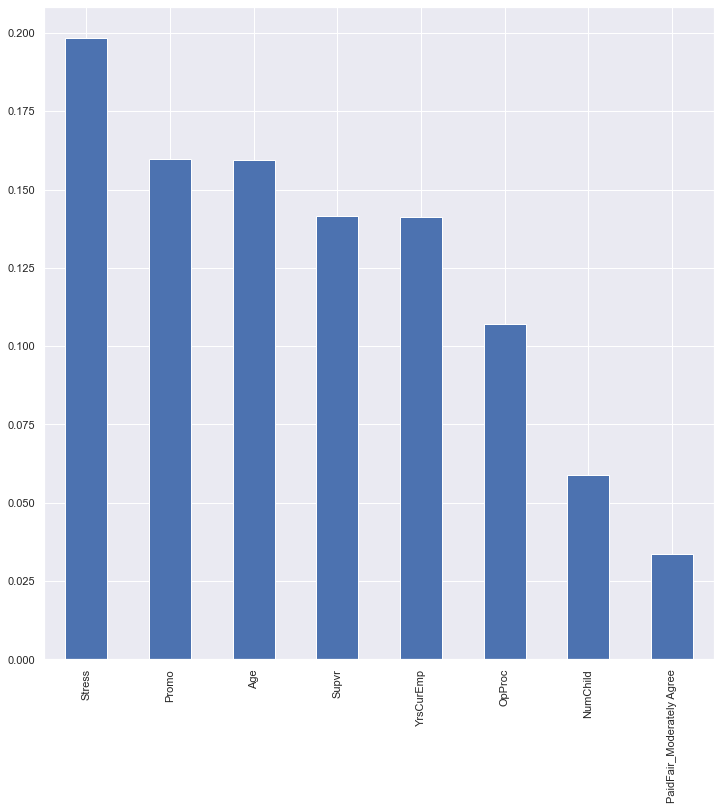

In [14]:
rf.fit(X_train_selected, y_train.ChgEmp.ravel())

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train_selected.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig = plt.figure(figsize=(12, 12))
feature_importances.plot.bar();

feature_importances

### Determing which feature best predicts the response variable

4 models will be created to test which feature best predicts an employee's intention to leave employer.

### Model 1: 

Predictor Variables: 'Stress', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree' (all selected variables except 'Age' and 'Promo')

Response Variable: 'ChgEmp'

### Model 2:

Predictor Variables: 'Promo', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree' (all selected variables except 'Age' and 'Stress') 

Response Variable: 'ChgEmp'

### Model 3: 

Predictor Variables: 'Age', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree'  (all selected variables except 'Stress' and 'Promo')

Response Variable: 'ChgEmp'

### Model 4: 

Predictor Variables: 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree' (all selected variables except 'Promo', 'Stress', 'Age')

Response Variable: 'ChgEmp'

The same Random Forest Classifier will be used for all models.

### Determining which model best predicts the response variable

Model 5 will be created to compare with the other models to evaluate which model is the best at predicting the response variable

### Model 5:

Predictor Variables: 'YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree'

Response Variable: 'ChgEmp'

The same Random Forest Classifier will be used for this model.

In [15]:
# Creating the datasets for all the models 
X_train_model1 = pd.DataFrame(X_train[['Stress', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])
X_test_model1 = pd.DataFrame(X_test[['Stress', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])

X_train_model2 = pd.DataFrame(X_train[['Promo', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])
X_test_model2 = pd.DataFrame(X_test[['Promo', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])

X_train_model3 = pd.DataFrame(X_train[['Age', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])
X_test_model3 = pd.DataFrame(X_test[['Age', 'YrsCurEmp', 'NumChild', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])

X_train_model4 = pd.DataFrame(X_train[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])
X_test_model4 = pd.DataFrame(X_test[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'PaidFair_Moderately Agree']])


## Model 1

In [16]:
# Fit Random Forest on Train Data
rf.fit(X_train_model1, y_train.ChgEmp.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.9631449631449631

TPR Train :	 0.9949622166246851
TNR Train :	 0.9328537170263789

FPR Train :	 0.0671462829736211
FNR Train :	 0.005037783375314861


<AxesSubplot:>

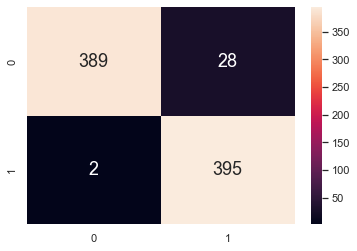

In [17]:
# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model1)

# Print the Classification Accuracy
m1_train_ca = rf.score(X_train_model1, y_train)
print("Train Data")
print("Accuracy  :\t", m1_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m1_train_tpr = tpTrain/(tpTrain + fnTrain)
m1_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m1_train_tpr)
print("TNR Train :\t", m1_train_tnr)
print()

m1_train_fpr = fpTrain/(tnTrain + fpTrain)
m1_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m1_train_fpr)
print("FNR Train :\t", m1_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8137254901960784

TPR Test :	 0.8214285714285714
TNR Test :	 0.8043478260869565

FPR Test :	 0.1956521739130435
FNR Test :	 0.17857142857142858


<AxesSubplot:>

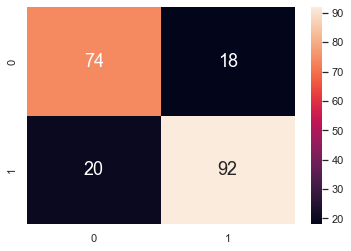

In [18]:
# Predict the Response corresponding to Predictors
y_test_pred = rf.predict(X_test_model1)

# Print the Classification Accuracy
m1_test_ca = rf.score(X_test_model1, y_test)
print("Test Data")
print("Accuracy  :\t", m1_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m1_test_tpr = tpTest/(tpTest + fnTest)
m1_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m1_test_tpr)
print("TNR Test :\t", m1_test_tnr)
print()

m1_test_fpr = fpTest/(tnTest + fpTest)
m1_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m1_test_fpr)
print("FNR Test :\t", m1_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [19]:
# Print the f1 score
m1_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.79      0.80      0.80        92
    Disagree       0.84      0.82      0.83       112

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204



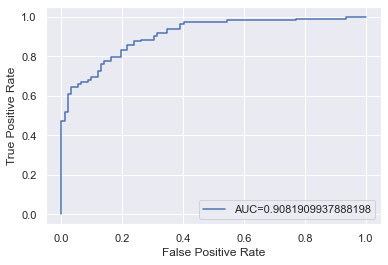

In [20]:
#define metrics
y_pred_proba = rf.predict_proba(X_test_model1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m1_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m1_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 2

In [21]:
# Fit Random Forest on Train Data
rf.fit(X_train_model2, y_train.ChgEmp.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.9508599508599509

TPR Train :	 0.9874055415617129
TNR Train :	 0.9160671462829736

FPR Train :	 0.08393285371702638
FNR Train :	 0.012594458438287154


<AxesSubplot:>

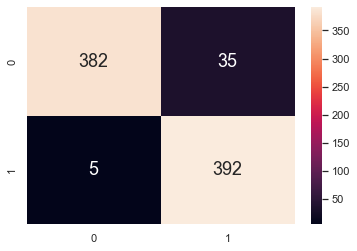

In [22]:
# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model2)

# Print the Classification Accuracy
m2_train_ca = rf.score(X_train_model2, y_train)
print("Train Data")
print("Accuracy  :\t", m2_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m2_train_tpr = tpTrain/(tpTrain + fnTrain)
m2_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m2_train_tpr)
print("TNR Train :\t", m2_train_tnr)
print()

m2_train_fpr = fpTrain/(tnTrain + fpTrain)
m2_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m2_train_fpr)
print("FNR Train :\t", m2_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.803921568627451

TPR Test :	 0.8035714285714286
TNR Test :	 0.8043478260869565

FPR Test :	 0.1956521739130435
FNR Test :	 0.19642857142857142


<AxesSubplot:>

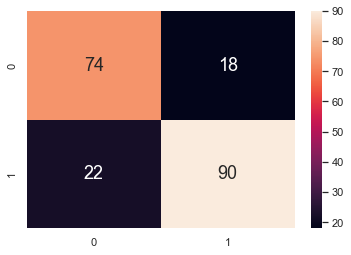

In [23]:
# Predict the Response corresponding to Predictors
y_test_pred = rf.predict(X_test_model2)

# Print the Classification Accuracy
m2_test_ca = rf.score(X_test_model2, y_test)
print("Test Data")
print("Accuracy  :\t", m2_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m2_test_tpr = tpTest/(tpTest + fnTest)
m2_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m2_test_tpr)
print("TNR Test :\t", m2_test_tnr)
print()

m2_test_fpr = fpTest/(tnTest + fpTest)
m2_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m2_test_fpr)
print("FNR Test :\t", m2_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [24]:
# Print the f1 score
m2_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.77      0.80      0.79        92
    Disagree       0.83      0.80      0.82       112

    accuracy                           0.80       204
   macro avg       0.80      0.80      0.80       204
weighted avg       0.81      0.80      0.80       204



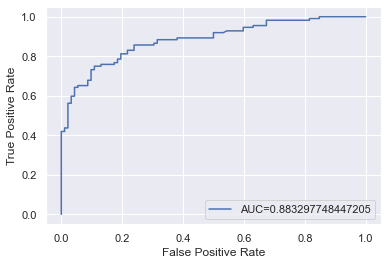

In [25]:
#define metrics
y_pred_proba = rf.predict_proba(X_test_model2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m2_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m2_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 3

In [26]:
# Fit Random Forest on Train Data
rf.fit(X_train_model3, y_train.ChgEmp.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.961916461916462

TPR Train :	 0.9874055415617129
TNR Train :	 0.9376498800959233

FPR Train :	 0.06235011990407674
FNR Train :	 0.012594458438287154


<AxesSubplot:>

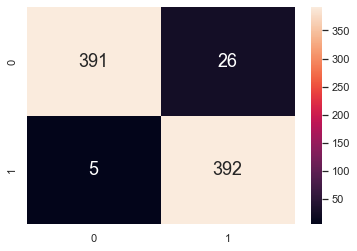

In [27]:
# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model3)

# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model3)

# Print the Classification Accuracy
m3_train_ca = rf.score(X_train_model3, y_train)
print("Train Data")
print("Accuracy  :\t", m3_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m3_train_tpr = tpTrain/(tpTrain + fnTrain)
m3_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m3_train_tpr)
print("TNR Train :\t", m3_train_tnr)
print()

m3_train_fpr = fpTrain/(tnTrain + fpTrain)
m3_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m3_train_fpr)
print("FNR Train :\t", m3_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8235294117647058

TPR Test :	 0.8392857142857143
TNR Test :	 0.8043478260869565

FPR Test :	 0.1956521739130435
FNR Test :	 0.16071428571428573


<AxesSubplot:>

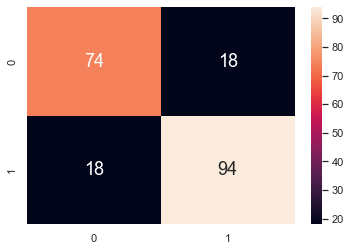

In [28]:
# Predict the Response corresponding to Predictors
y_test_pred = rf.predict(X_test_model3)

# Print the Classification Accuracy
m3_test_ca = rf.score(X_test_model3, y_test)
print("Test Data")
print("Accuracy  :\t", m3_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m3_test_tpr = tpTest/(tpTest + fnTest)
m3_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m3_test_tpr)
print("TNR Test :\t", m3_test_tnr)
print()

m3_test_fpr = fpTest/(tnTest + fpTest)
m3_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m3_test_fpr)
print("FNR Test :\t", m3_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [29]:
m3_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.80      0.80      0.80        92
    Disagree       0.84      0.84      0.84       112

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82       204
weighted avg       0.82      0.82      0.82       204



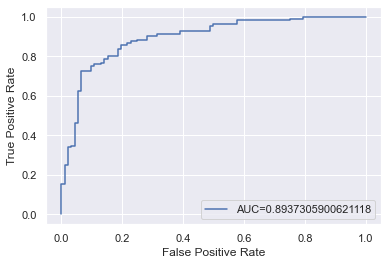

In [30]:
#define metrics
y_pred_proba = rf.predict_proba(X_test_model3)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m3_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m3_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 4

In [31]:
# Fit Random Forest on Train Data
rf.fit(X_train_model4, y_train.ChgEmp.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.9791154791154791

TPR Train :	 1.0
TNR Train :	 0.9592326139088729

FPR Train :	 0.0407673860911271
FNR Train :	 0.0


<AxesSubplot:>

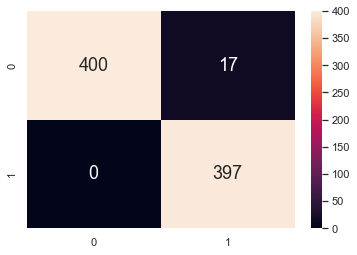

In [32]:
# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model4)

# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_model4)

# Print the Classification Accuracy
m4_train_ca = rf.score(X_train_model4, y_train)
print("Train Data")
print("Accuracy  :\t", m4_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m4_train_tpr = tpTrain/(tpTrain + fnTrain)
m4_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m4_train_tpr)
print("TNR Train :\t", m4_train_tnr)
print()

m4_train_fpr = fpTrain/(tnTrain + fpTrain)
m4_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m4_train_fpr)
print("FNR Train :\t", m4_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7892156862745098

TPR Test :	 0.7946428571428571
TNR Test :	 0.782608695652174

FPR Test :	 0.21739130434782608
FNR Test :	 0.20535714285714285


<AxesSubplot:>

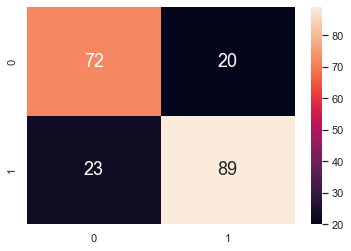

In [33]:
# Predict the Response corresponding to Predictors
y_test_pred = rf.predict(X_test_model4)

# Print the Classification Accuracy
m4_test_ca = rf.score(X_test_model4, y_test)
print("Test Data")
print("Accuracy  :\t", m4_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m4_test_tpr = tpTest/(tpTest + fnTest)
m4_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m4_test_tpr)
print("TNR Test :\t", m4_test_tnr)
print()

m4_test_fpr = fpTest/(tnTest + fpTest)
m4_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m4_test_fpr)
print("FNR Test :\t", m4_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
m4_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.76      0.78      0.77        92
    Disagree       0.82      0.79      0.81       112

    accuracy                           0.79       204
   macro avg       0.79      0.79      0.79       204
weighted avg       0.79      0.79      0.79       204



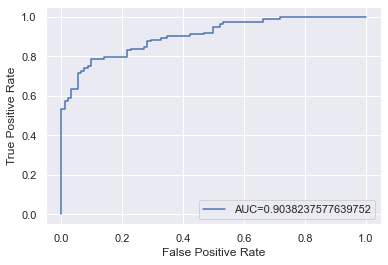

In [35]:
#define metrics
y_pred_proba = rf.predict_proba(X_test_model4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m4_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m4_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 5

In [36]:
# Fit Random Forest on Train Data
rf.fit(X_train_selected, y_train.ChgEmp.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.9803439803439803

TPR Train :	 0.9974811083123426
TNR Train :	 0.9640287769784173

FPR Train :	 0.03597122302158273
FNR Train :	 0.0025188916876574307


<AxesSubplot:>

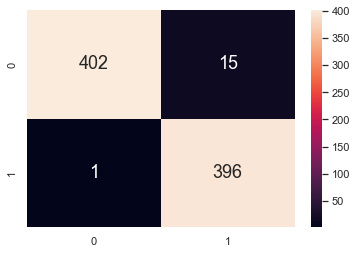

In [37]:
# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_selected)

# Predict the Response corresponding to Predictors
y_train_pred = rf.predict(X_train_selected)

# Print the Classification Accuracy
m5_train_ca = rf.score(X_train_selected, y_train)
print("Train Data")
print("Accuracy  :\t", m5_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m5_train_tpr = tpTrain/(tpTrain + fnTrain)
m5_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m5_train_tpr)
print("TNR Train :\t", m5_train_tnr)
print()

m5_train_fpr = fpTrain/(tnTrain + fpTrain)
m5_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m5_train_fpr)
print("FNR Train :\t", m5_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8186274509803921

TPR Test :	 0.8214285714285714
TNR Test :	 0.8152173913043478

FPR Test :	 0.18478260869565216
FNR Test :	 0.17857142857142858


<AxesSubplot:>

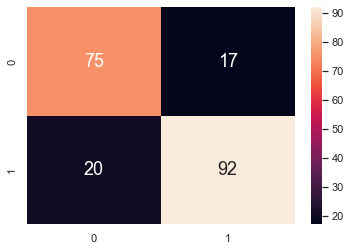

In [38]:
# Predict the Response corresponding to Predictors
y_test_pred = rf.predict(X_test_selected)

# Print the Classification Accuracy
m5_test_ca = rf.score(X_test_selected, y_test)
print("Test Data")
print("Accuracy  :\t", m5_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m5_test_tpr = tpTest/(tpTest + fnTest)
m5_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m5_test_tpr)
print("TNR Test :\t", m5_test_tnr)
print()

m5_test_fpr = fpTest/(tnTest + fpTest)
m5_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m5_test_fpr)
print("FNR Test :\t", m5_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [39]:
m5_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.79      0.82      0.80        92
    Disagree       0.84      0.82      0.83       112

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82       204
weighted avg       0.82      0.82      0.82       204



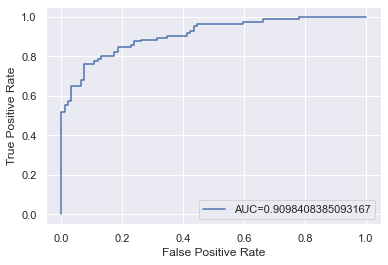

In [40]:
#define metrics
y_pred_proba = rf.predict_proba(X_test_selected)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m5_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m5_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

### Selection of  potential features that are good predictors of the response variable

Potential features that best predicts the response variable in the training dataset will be determined using the Recursive Feature Elimination function from sickitlearn feature selection module. The Logistic Regression model (with the parameters max_iter=1000) will be passed in as a parameter of the Recursive Feature Elimination function.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Logistic regression model
lg=LogisticRegression(max_iter=1000)

In [43]:
# Selection of features
selector=RFE(lg, n_features_to_select=1)
selector=selector.fit(X_train, y_train.ChgEmp.ravel())

feature_ranks = []
for i in selector.ranking_:
    if i<10:
        feature_ranks.append(f"{i} {X.columns[i-1]}")
feature_ranks.sort()
feature_ranks

['1 YrsCurEmp',
 '2 NumChild',
 '3 Stress',
 '4 Age',
 '5 Promo',
 '6 OpProc',
 '7 Supvr',
 '8 HseCare_All My Responsibility',
 '9 HseCare_All Partner Responsibility']

### Determing which feature best predicts the response variable

4 models will be created to test which feature best predicts an employee's intention to leave employer.

### Model 6: 

Predictor Variables: 'YrsCurEmp', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility' (all selected variables except 'Stress' and 'NumChild')

Response Variable: 'ChgEmp'

### Model 7:

Predictor Variables: 'NumChild', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility' (all selected variables except 'YrsCurEmp' and 'Stress')

Response Variable: 'ChgEmp'

### Model 8: 

Predictor Variables: 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility' (all selected variables except 'YrsCurEmp' and 'NumChild')

Response Variable: 'ChgEmp'

### Model 9: 

Predictor Variables: 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility' (all selected variables except 'YrsCurEmp', 'Stress', 'NumChild')

Response Variable: 'ChgEmp'

The same Logistic Regression Model will be used for all models.

### Determining which model best predicts the response variable

Model 10 will be created to compare with the other models to evaluate which model is the best at predicting the response variable

### Model 10:

Predictor Variables: 'YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility'

Response Variable: 'ChgEmp'

The same Logistic Regression Model will be used for this model.

In [44]:
# Updating the X datasets for all models
X_train_model6 = pd.DataFrame(X_train[['YrsCurEmp', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])
X_test_model6 = pd.DataFrame(X_test[['YrsCurEmp', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])

X_train_model7 = pd.DataFrame(X_train[['NumChild', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])
X_test_model7 = pd.DataFrame(X_test[['NumChild', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])

X_train_model8 = pd.DataFrame(X_train[['Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])
X_test_model8 = pd.DataFrame(X_test[['Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])

X_train_model9 = pd.DataFrame(X_train[['Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])
X_test_model9 = pd.DataFrame(X_test[['Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])

X_train_model10 = pd.DataFrame(X_train[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])
X_test_model10 = pd.DataFrame(X_test[['YrsCurEmp', 'NumChild', 'Stress', 'Age', 'Promo', 'OpProc', 'Supvr', 'HseCare_All My Responsibility', 'HseCare_All Partner Responsibility']])


## Model 6

In [45]:
# Fit Random Forest on Train Data
lg.fit(X_train_model6, y_train.ChgEmp.ravel())

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6904176904176904

TPR Train :	 0.7178841309823678
TNR Train :	 0.6642685851318945

FPR Train :	 0.33573141486810554
FNR Train :	 0.28211586901763225


<AxesSubplot:>

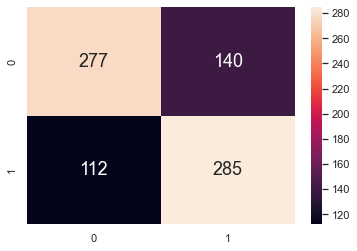

In [46]:
# Predict the Response corresponding to Predictors
y_train_pred = lg.predict(X_train_model6)

# Print the Classification Accuracy
m6_train_ca = lg.score(X_train_model6, y_train)
print("Train Data")
print("Accuracy  :\t", m6_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m6_train_tpr = tpTrain/(tpTrain + fnTrain)
m6_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m6_train_tpr)
print("TNR Train :\t", m6_train_tnr)
print()

m6_train_fpr = fpTrain/(tnTrain + fpTrain)
m6_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m6_train_fpr)
print("FNR Train :\t", m6_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7303921568627451

TPR Test :	 0.7589285714285714
TNR Test :	 0.6956521739130435

FPR Test :	 0.30434782608695654
FNR Test :	 0.24107142857142858


<AxesSubplot:>

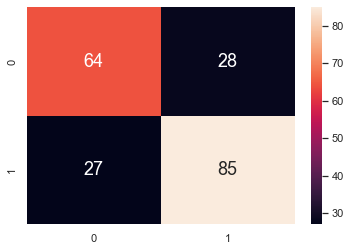

In [47]:
# Predict the Response corresponding to Predictors
y_test_pred = lg.predict(X_test_model6)

# Print the Classification Accuracy
m6_test_ca = lg.score(X_test_model6, y_test)
print("Test Data")
print("Accuracy  :\t", m6_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m6_test_tpr = tpTest/(tpTest + fnTest)
m6_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m6_test_tpr)
print("TNR Test :\t", m6_test_tnr)
print()

m6_test_fpr = fpTest/(tnTest + fpTest)
m6_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m6_test_fpr)
print("FNR Test :\t", m6_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [48]:
m6_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.70      0.70      0.70        92
    Disagree       0.75      0.76      0.76       112

    accuracy                           0.73       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.73      0.73      0.73       204



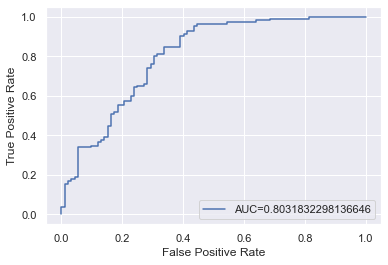

In [49]:
#define metrics
y_pred_proba = lg.predict_proba(X_test_model6)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m6_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m6_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 7

In [50]:
# Fit Random Forest on Train Data
lg.fit(X_train_model7, y_train.ChgEmp.ravel())

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.7039312039312039

TPR Train :	 0.7279596977329975
TNR Train :	 0.6810551558752997

FPR Train :	 0.31894484412470026
FNR Train :	 0.27204030226700254


<AxesSubplot:>

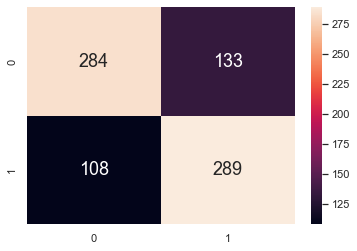

In [51]:
# Predict the Response corresponding to Predictors
y_train_pred = lg.predict(X_train_model7)

# Print the Classification Accuracy
m7_train_ca = lg.score(X_train_model7, y_train)
print("Train Data")
print("Accuracy  :\t", m7_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m7_train_tpr = tpTrain/(tpTrain + fnTrain)
m7_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m7_train_tpr)
print("TNR Train :\t", m7_train_tnr)
print()

m7_train_fpr = fpTrain/(tnTrain + fpTrain)
m7_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m7_train_fpr)
print("FNR Train :\t", m7_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7303921568627451

TPR Test :	 0.7589285714285714
TNR Test :	 0.6956521739130435

FPR Test :	 0.30434782608695654
FNR Test :	 0.24107142857142858


<AxesSubplot:>

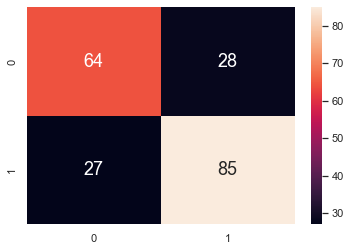

In [52]:
# Predict the Response corresponding to Predictors
y_test_pred = lg.predict(X_test_model7)

# Print the Classification Accuracy
m7_test_ca = lg.score(X_test_model7, y_test)
print("Test Data")
print("Accuracy  :\t", m7_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m7_test_tpr = tpTest/(tpTest + fnTest)
m7_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m7_test_tpr)
print("TNR Test :\t", m7_test_tnr)
print()

m7_test_fpr = fpTest/(tnTest + fpTest)
m7_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m7_test_fpr)
print("FNR Test :\t", m7_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [53]:
m7_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.70      0.70      0.70        92
    Disagree       0.75      0.76      0.76       112

    accuracy                           0.73       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.73      0.73      0.73       204



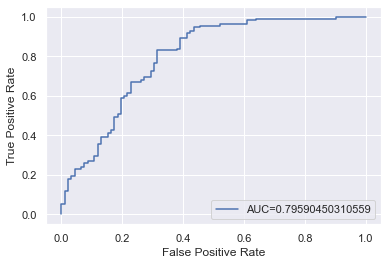

In [54]:
#define metrics
y_pred_proba = lg.predict_proba(X_test_model7)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m7_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m7_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 8

In [55]:
# Fit Random Forest on Train Data
lg.fit(X_train_model8, y_train.ChgEmp.ravel())

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.7113022113022113

TPR Train :	 0.760705289672544
TNR Train :	 0.6642685851318945

FPR Train :	 0.33573141486810554
FNR Train :	 0.23929471032745592


<AxesSubplot:>

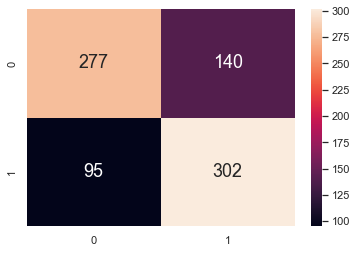

In [56]:
# Predict the Response corresponding to Predictors
y_train_pred = lg.predict(X_train_model8)

# Print the Classification Accuracy
m8_train_ca = lg.score(X_train_model8, y_train)
print("Train Data")
print("Accuracy  :\t", m8_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m8_train_tpr = tpTrain/(tpTrain + fnTrain)
m8_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m8_train_tpr)
print("TNR Train :\t", m8_train_tnr)
print()

m8_train_fpr = fpTrain/(tnTrain + fpTrain)
m8_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m8_train_fpr)
print("FNR Train :\t", m8_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7450980392156863

TPR Test :	 0.75
TNR Test :	 0.7391304347826086

FPR Test :	 0.2608695652173913
FNR Test :	 0.25


<AxesSubplot:>

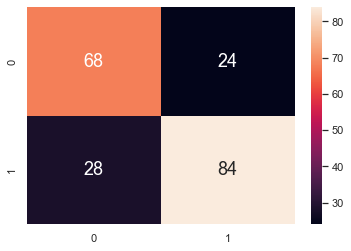

In [57]:
# Predict the Response corresponding to Predictors
y_test_pred = lg.predict(X_test_model8)

# Print the Classification Accuracy
m8_test_ca = lg.score(X_test_model8, y_test)
print("Test Data")
print("Accuracy  :\t", m8_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m8_test_tpr = tpTest/(tpTest + fnTest)
m8_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m8_test_tpr)
print("TNR Test :\t", m8_test_tnr)
print()

m8_test_fpr = fpTest/(tnTest + fpTest)
m8_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m8_test_fpr)
print("FNR Test :\t", m8_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [58]:
m8_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.71      0.74      0.72        92
    Disagree       0.78      0.75      0.76       112

    accuracy                           0.75       204
   macro avg       0.74      0.74      0.74       204
weighted avg       0.75      0.75      0.75       204



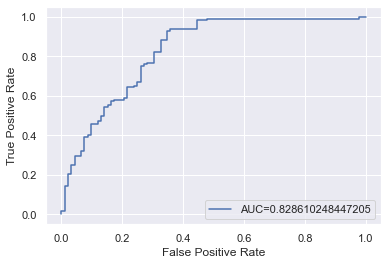

In [59]:
#define metrics
y_pred_proba = lg.predict_proba(X_test_model8)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m8_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m8_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 9

In [60]:
# Fit Random Forest on Train Data
lg.fit(X_train_model9, y_train.ChgEmp.ravel())

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6916461916461917

TPR Train :	 0.7204030226700252
TNR Train :	 0.6642685851318945

FPR Train :	 0.33573141486810554
FNR Train :	 0.2795969773299748


<AxesSubplot:>

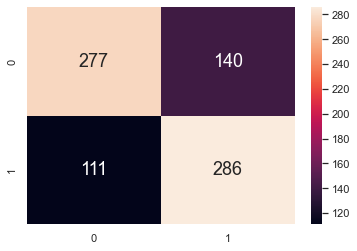

In [61]:
# Predict the Response corresponding to Predictors
y_train_pred = lg.predict(X_train_model9)

# Print the Classification Accuracy
m9_train_ca = lg.score(X_train_model9, y_train)
print("Train Data")
print("Accuracy  :\t", m9_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m9_train_tpr = tpTrain/(tpTrain + fnTrain)
m9_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m9_train_tpr)
print("TNR Train :\t", m9_train_tnr)
print()

m9_train_fpr = fpTrain/(tnTrain + fpTrain)
m9_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m9_train_fpr)
print("FNR Train :\t", m9_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7156862745098039

TPR Test :	 0.7321428571428571
TNR Test :	 0.6956521739130435

FPR Test :	 0.30434782608695654
FNR Test :	 0.26785714285714285


<AxesSubplot:>

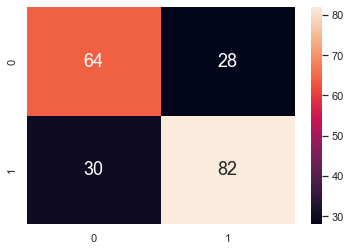

In [62]:
# Predict the Response corresponding to Predictors
y_test_pred = lg.predict(X_test_model9)

# Print the Classification Accuracy
m9_test_ca = lg.score(X_test_model9, y_test)
print("Test Data")
print("Accuracy  :\t", m9_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m9_test_tpr = tpTest/(tpTest + fnTest)
m9_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m9_test_tpr)
print("TNR Test :\t", m9_test_tnr)
print()

m9_test_fpr = fpTest/(tnTest + fpTest)
m9_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m9_test_fpr)
print("FNR Test :\t", m9_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [63]:
m9_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.68      0.70      0.69        92
    Disagree       0.75      0.73      0.74       112

    accuracy                           0.72       204
   macro avg       0.71      0.71      0.71       204
weighted avg       0.72      0.72      0.72       204



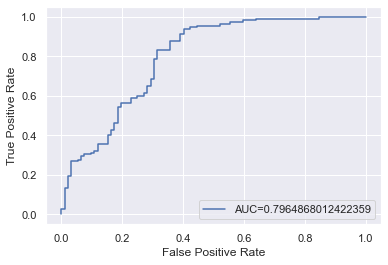

In [64]:
#define metrics
y_pred_proba = lg.predict_proba(X_test_model9)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m9_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m9_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Model 10

In [65]:
# Fit Random Forest on Train Data
lg.fit(X_train_model10, y_train.ChgEmp.ravel())

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.7014742014742015

TPR Train :	 0.7279596977329975
TNR Train :	 0.6762589928057554

FPR Train :	 0.3237410071942446
FNR Train :	 0.27204030226700254


<AxesSubplot:>

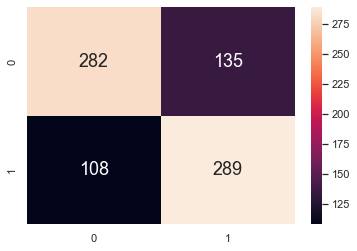

In [66]:
# Predict the Response corresponding to Predictors
y_train_pred = lg.predict(X_train_model10)

# Print the Classification Accuracy
m10_train_ca = lg.score(X_train_model10, y_train)
print("Train Data")
print("Accuracy  :\t", m10_train_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

m10_train_tpr = tpTrain/(tpTrain + fnTrain)
m10_train_tnr = tnTrain/(tnTrain + fpTrain)

print("TPR Train :\t", m10_train_tpr)
print("TNR Train :\t", m10_train_tnr)
print()

m10_train_fpr = fpTrain/(tnTrain + fpTrain)
m10_train_fnr = fnTrain/(tpTrain + fnTrain)

print("FPR Train :\t", m10_train_fpr)
print("FNR Train :\t", m10_train_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7205882352941176

TPR Test :	 0.7053571428571429
TNR Test :	 0.7391304347826086

FPR Test :	 0.2608695652173913
FNR Test :	 0.29464285714285715


<AxesSubplot:>

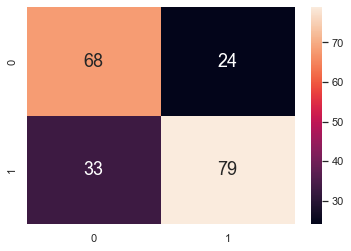

In [67]:
# Predict the Response corresponding to Predictors
y_test_pred = lg.predict(X_test_model10)

# Print the Classification Accuracy
m10_test_ca = lg.score(X_test_model10, y_test)
print("Test Data")
print("Accuracy  :\t", m10_test_ca)
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

m10_test_tpr = tpTest/(tpTest + fnTest)
m10_test_tnr = tnTest/(tnTest + fpTest)

print("TPR Test :\t", m10_test_tpr)
print("TNR Test :\t", m10_test_tnr)
print()

m10_test_fpr = fpTest/(tnTest + fpTest)
m10_test_fnr = fnTest/(tpTest + fnTest)

print("FPR Test :\t", m10_test_fpr)
print("FNR Test :\t", m10_test_fnr)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [68]:
m10_test_f1 = metrics.f1_score(y_test, y_test_pred, pos_label='Disagree')
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       Agree       0.67      0.74      0.70        92
    Disagree       0.77      0.71      0.73       112

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204



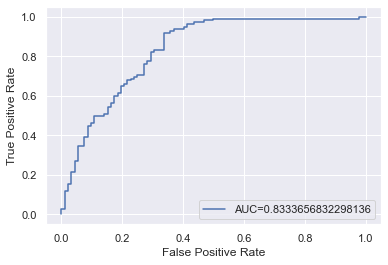

In [69]:
#define metrics
y_pred_proba = lg.predict_proba(X_test_model10)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Disagree')
m10_test_auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(m10_test_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Data Visualisation & Data-driven Insights

### Comparison of Random Forest Models

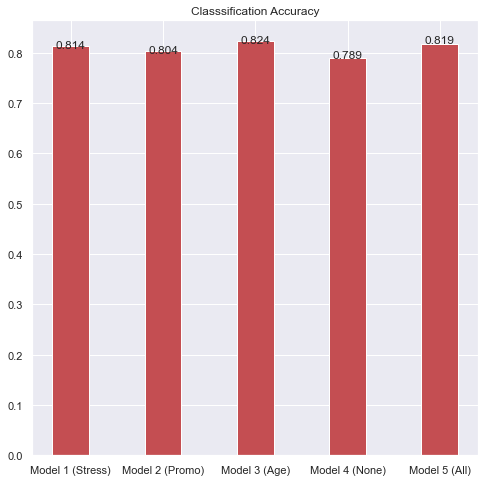

In [133]:
## Classification accuracies of the 5 models 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)']
y_list = [m1_test_ca, m2_test_ca, m3_test_ca, m4_test_ca, m5_test_ca]

addlabels(x_list, y_list)

plt.bar(x_list, y_list, color ='r',
        width = 0.4)
 
plt.title("Classsification Accuracy")
plt.show()

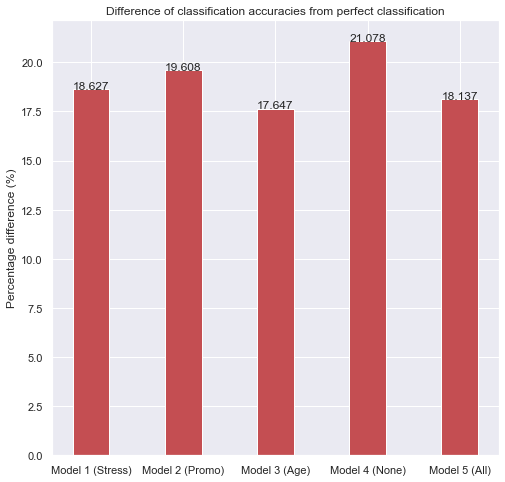

In [134]:
## Percentage difference of classification accuracies from perfect classification
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)']
y_list = [(1-m1_test_ca)*100, (1-m2_test_ca)*100, (1-m3_test_ca)*100, (1-m4_test_ca)*100, (1-m5_test_ca)*100]

addlabels(x_list, y_list)

plt.bar(x_list, y_list, color ='r',
        width = 0.4)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of classification accuracies from perfect classification")
plt.show()

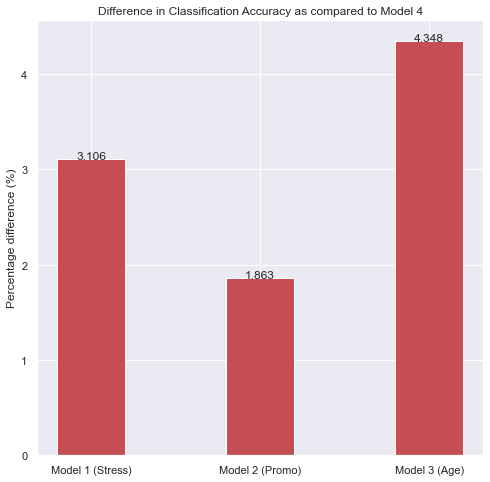

In [135]:
# Difference in classification accuracies from that of Model 4
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)']
y_list = [((m1_test_ca-m4_test_ca)/m4_test_ca)*100, ((m2_test_ca-m4_test_ca)/m4_test_ca)*100, ((m3_test_ca-m4_test_ca)/m4_test_ca)*100]

plt.bar(x_list, y_list, color ='r',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in Classification Accuracy as compared to Model 4")
plt.show()

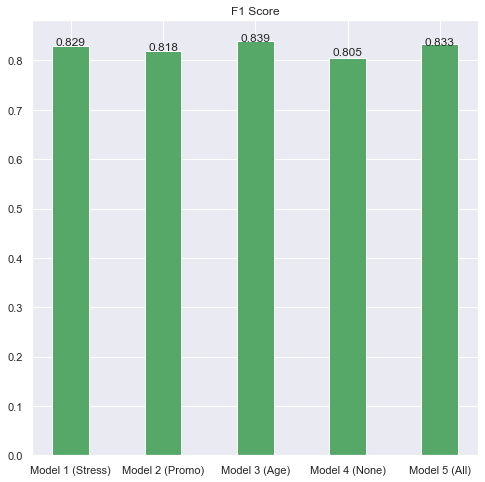

In [136]:
## F1 Score of the 4 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)']
y_list = [m1_test_f1, m2_test_f1, m3_test_f1, m4_test_f1, m5_test_f1]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)
 
addlabels(x_list, y_list)

plt.title("F1 Score")
plt.show()

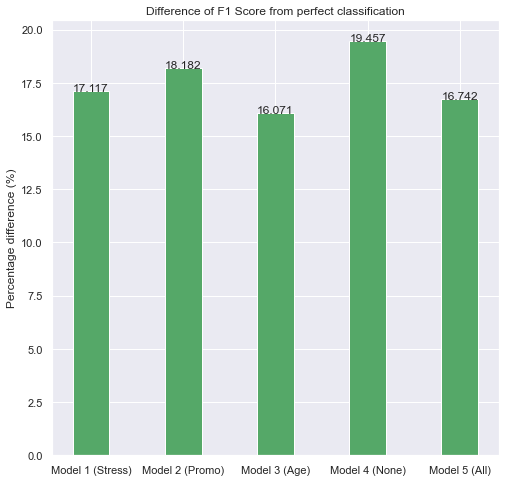

In [137]:
## Percentage difference of F1 score from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)']
y_list = [(1-m1_test_f1)*100, (1-m2_test_f1)*100, (1-m3_test_f1)*100, (1-m4_test_f1)*100, (1-m5_test_f1)*100]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of F1 Score from perfect classification")
plt.show()

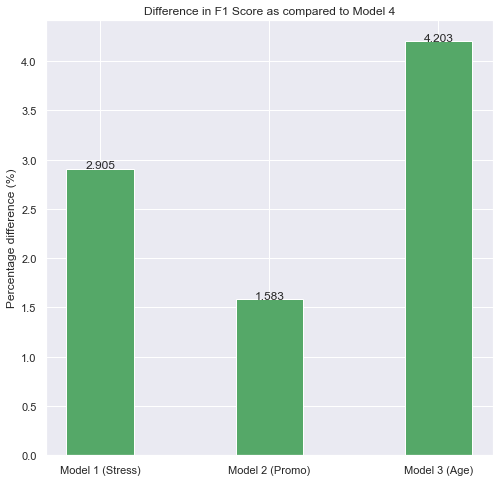

In [138]:
# Difference in F1 Scores from that of Model 4

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)']
y_list = [((m1_test_f1-m4_test_f1)/m4_test_f1)*100, ((m2_test_f1-m4_test_f1)/m4_test_f1)*100, ((m3_test_f1-m4_test_f1)/m4_test_f1)*100]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in F1 Score as compared to Model 4")
plt.show()

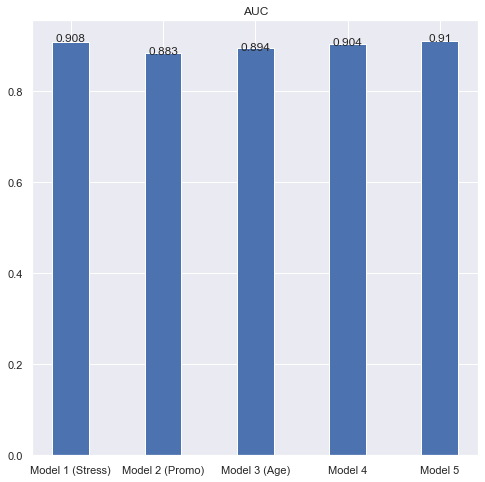

In [139]:
## AUC of the 4 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4', 'Model 5']
y_list = [m1_test_auc, m2_test_auc, m3_test_auc, m4_test_auc, m5_test_auc]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("AUC")
plt.show()

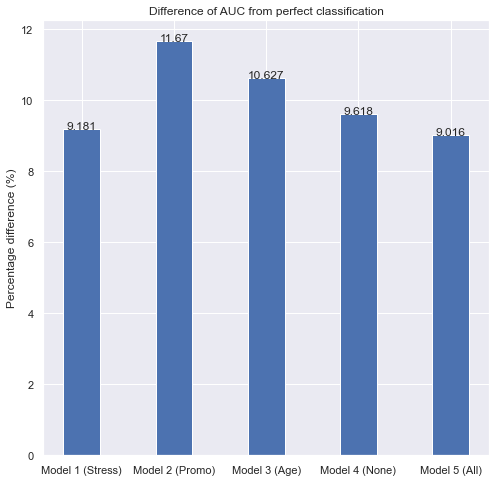

In [140]:
## Percentage difference of AUC from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)']
y_list = [(1-m1_test_auc)*100, (1-m2_test_auc)*100, (1-m3_test_auc)*100, (1-m4_test_auc)*100, (1-m5_test_auc)*100]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of AUC from perfect classification")
plt.show()

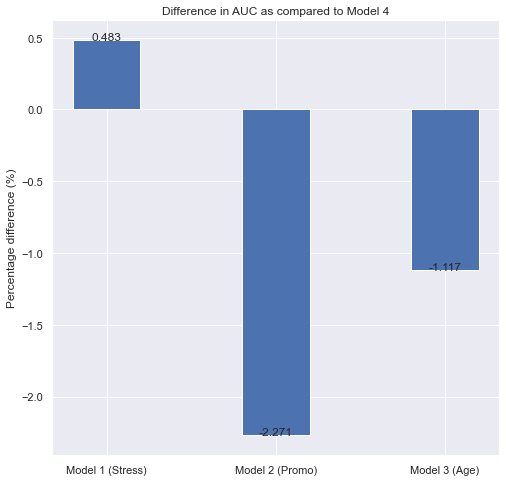

In [141]:
# Difference in AUC

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)']
y_list = [((m1_test_auc-m4_test_auc)/m4_test_auc)*100, ((m2_test_auc-m4_test_auc)/m4_test_auc)*100, ((m3_test_auc-m4_test_auc)/m4_test_auc)*100]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in AUC as compared to Model 4")
plt.show()

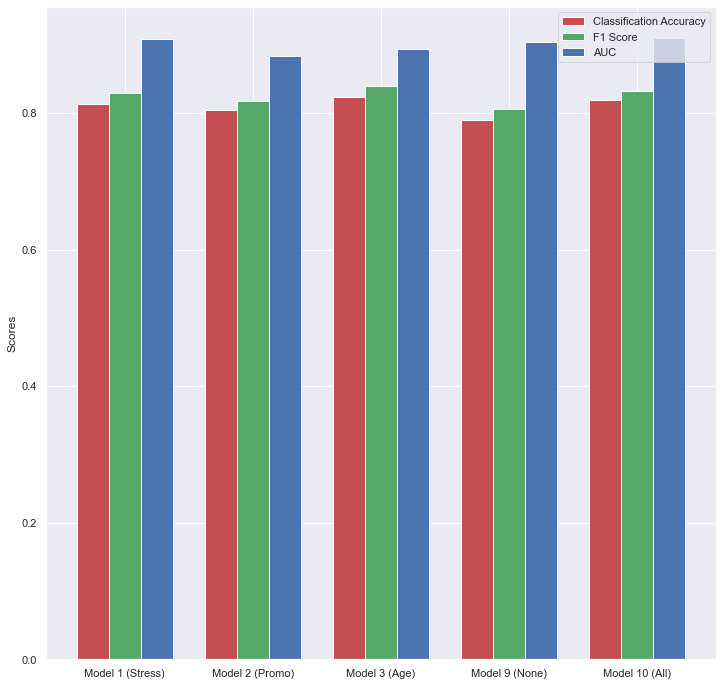

In [142]:
# Classification Accuracy, F1 Score, AUC of the 5 models

ind = np.arange(5) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [m1_test_ca, m2_test_ca, m3_test_ca, m4_test_ca, m5_test_ca]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [m1_test_f1, m2_test_f1, m3_test_f1, m4_test_f1, m5_test_f1]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [m1_test_auc, m2_test_auc, m3_test_auc, m4_test_auc, m5_test_auc]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Scores")
  
plt.xticks(ind+width,['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 9 (None)', 'Model 10 (All)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

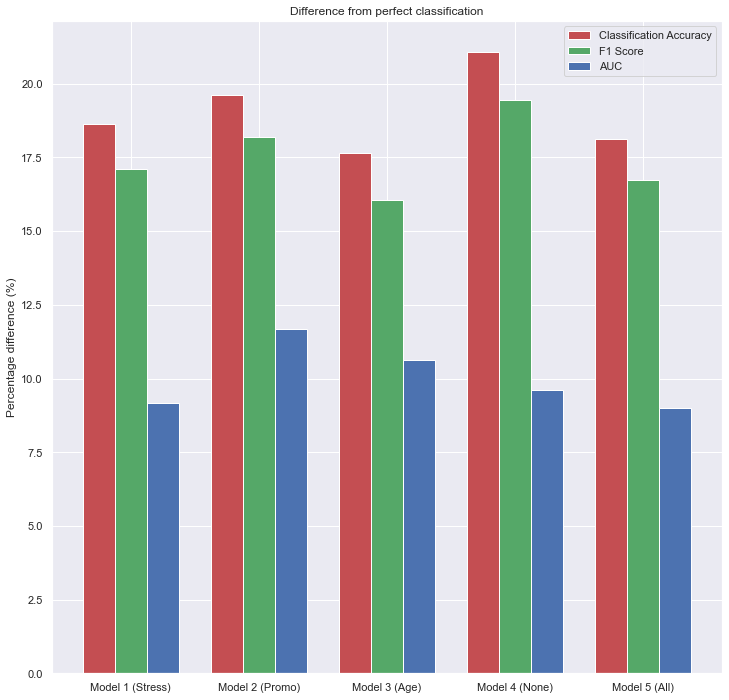

In [157]:
# Percentage difference from perfect classification

ind = np.arange(5) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [(1-m1_test_ca)*100, (1-m2_test_ca)*100, (1-m3_test_ca)*100, (1-m4_test_ca)*100, (1-m5_test_ca)*100]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [(1-m1_test_f1)*100, (1-m2_test_f1)*100, (1-m3_test_f1)*100, (1-m4_test_f1)*100, (1-m5_test_f1)*100]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [(1-m1_test_auc)*100, (1-m2_test_auc)*100, (1-m3_test_auc)*100, (1-m4_test_auc)*100, (1-m5_test_auc)*100]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Percentage difference (%)")
plt.title("Difference from perfect classification")
  
plt.xticks(ind+width,['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)', 'Model 4 (None)', 'Model 5 (All)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

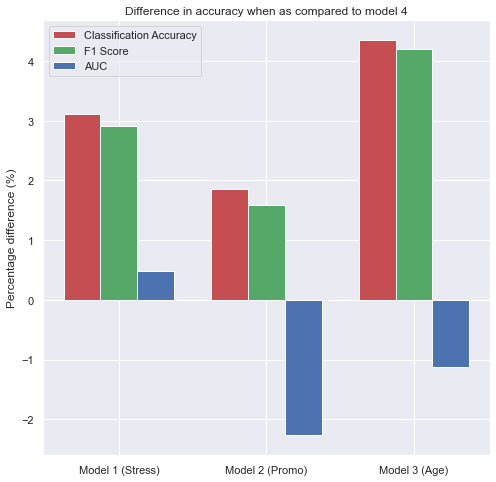

In [158]:
# Difference in Classification Accuracy, F1 Score, AUC of the 4 models

ind = np.arange(3) 
width = 0.25

fig = plt.figure(figsize=(8, 8))
xvals = [((m1_test_ca-m4_test_ca)/m4_test_ca)*100, ((m2_test_ca-m4_test_ca)/m4_test_ca)*100, ((m3_test_ca-m4_test_ca)/m4_test_ca)*100]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [((m1_test_f1-m4_test_f1)/m4_test_f1)*100, ((m2_test_f1-m4_test_f1)/m4_test_f1)*100, ((m3_test_f1-m4_test_f1)/m4_test_f1)*100]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [((m1_test_auc-m4_test_auc)/m4_test_auc)*100, ((m2_test_auc-m4_test_auc)/m4_test_auc)*100, ((m3_test_auc-m4_test_auc)/m4_test_auc)*100]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Percentage difference (%)")
plt.title("Difference in accuracy when as compared to model 4")
  
plt.xticks(ind+width,['Model 1 (Stress)', 'Model 2 (Promo)', 'Model 3 (Age)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

### Observations:
Model 3 (Age) has the highest classification accuracy and F1 score among all the models. As compared to Model 4 which excludes the top 3 best features, Model 3 has a classification accuracy about 4.3% higher than that of Model 4,  and 4.2% higher than that of Model 4. The classification accuracy and F1 score of Model 3 is also higher than that for Model 5. Model 1 has the highest AUC score among Model 1 to 4 and has an AUC which is about 0.4% higher than that of Model 4, but Model 5 has the highest AUC overall.

### Insights:
The model that includes Age as a predictor generally performed the best, and even better than Model 5 which included the top 3 variables in terms of classification accuracy and F1 score. This suggests that Age is a key predictor of employee's intention to leave his or her employer. It also suggests that the inclusion of Stress and Promo as predictors may have resulted in the overfitting of the model to the train set and the test set is best predicted with the inclusion of only Age, as seen from Stress and Promo being rated higher than Age in terms of feature importance, but the model that included Age performed better than that which included Stress, Promo or both.


### Comparison of Logistic Regression Models

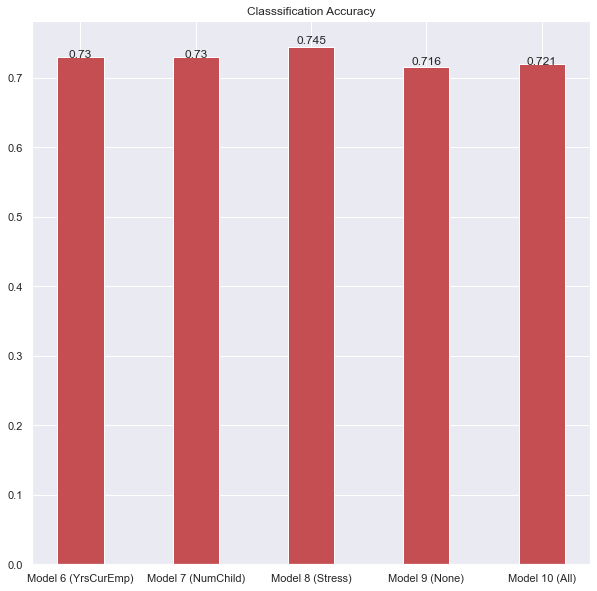

In [145]:
## Classification accuracies of the 5 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [m6_test_ca, m7_test_ca, m8_test_ca, m9_test_ca, m10_test_ca]

plt.bar(x_list, y_list, color ='r',
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("Classsification Accuracy")
plt.show()

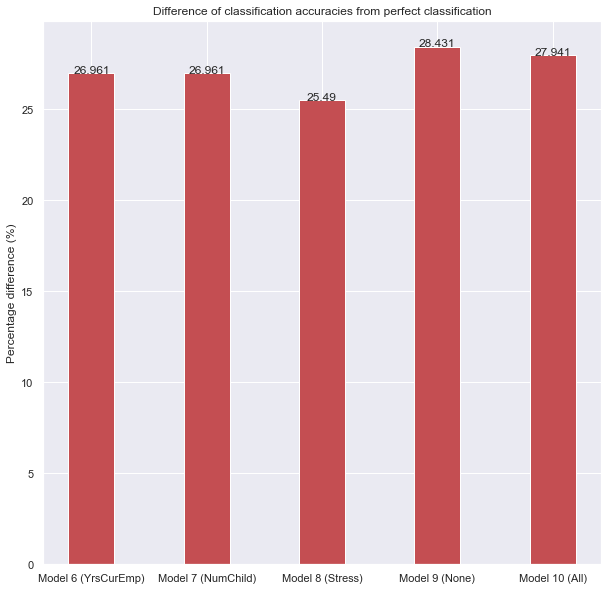

In [159]:
## Percentage difference of classification accuracies from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [(1-m6_test_ca)*100, (1-m7_test_ca)*100, (1-m8_test_ca)*100, (1-m9_test_ca)*100, (1-m10_test_ca)*100]

plt.bar(x_list, y_list, color ='r',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of classification accuracies from perfect classification")
plt.show()

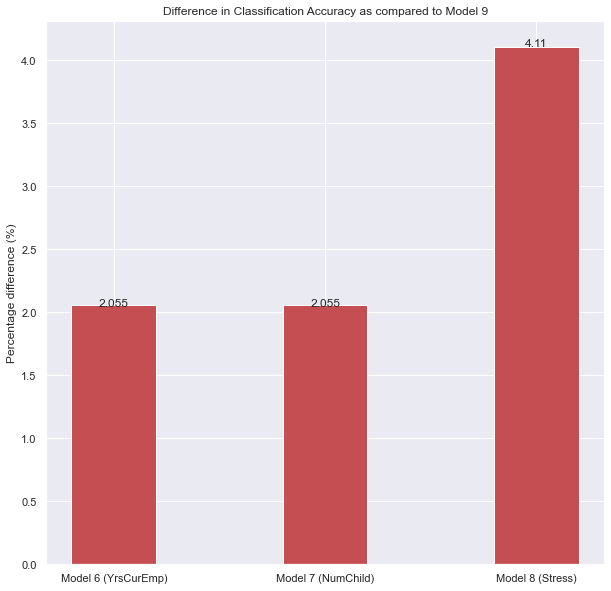

In [160]:
# Difference in classification accuracies

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)']
y_list = [((m6_test_ca-m9_test_ca)/m9_test_ca)*100, ((m7_test_ca-m9_test_ca)/m9_test_ca)*100, ((m8_test_ca-m9_test_ca)/m9_test_ca)*100]

plt.bar(x_list, y_list, color ='r',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in Classification Accuracy as compared to Model 9")
plt.show()

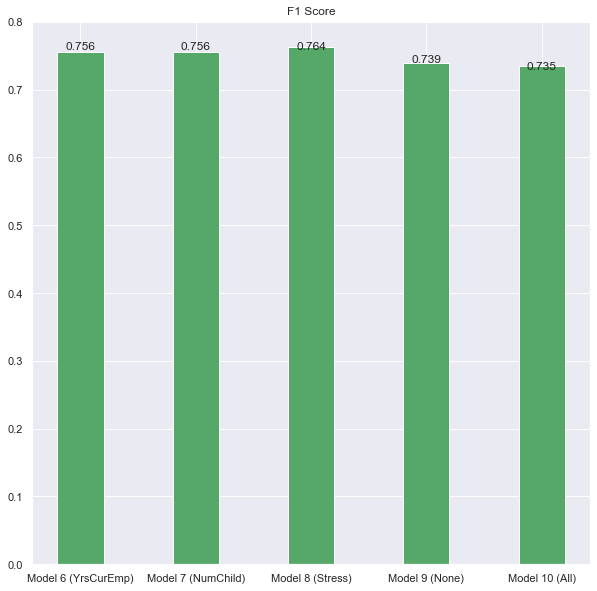

In [164]:
## F1 Score of the 5 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [m6_test_f1, m7_test_f1, m8_test_f1, m9_test_f1, m10_test_f1]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("F1 Score")
plt.show()

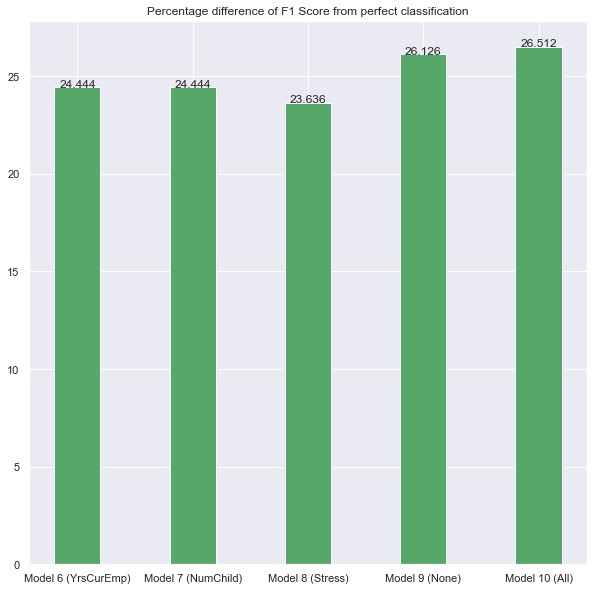

In [165]:
## Percentage difference of f1 score from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [(1-m6_test_f1)*100, (1-m7_test_f1)*100, (1-m8_test_f1)*100, (1-m9_test_f1)*100, (1-m10_test_f1)*100]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("Percentage difference of F1 Score from perfect classification")
plt.show()

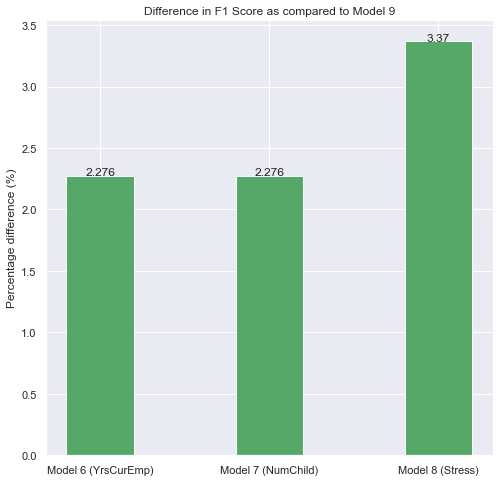

In [166]:
# Difference in F1 Score

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(8, 8))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)']
y_list = [((m6_test_f1-m9_test_f1)/m9_test_f1)*100, ((m7_test_f1-m9_test_f1)/m9_test_f1)*100, ((m8_test_f1-m9_test_f1)/m9_test_f1)*100]

plt.bar(x_list, y_list, color ='g',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in F1 Score as compared to Model 9")
plt.show()

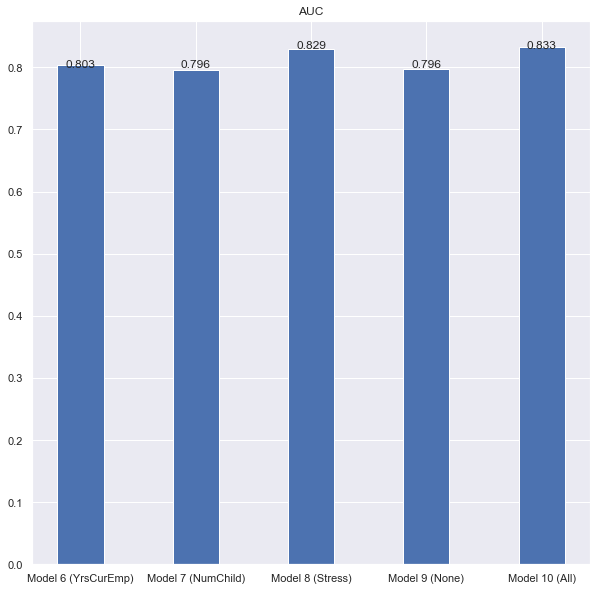

In [168]:
## AUC of the 5 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [m6_test_auc, m7_test_auc, m8_test_auc, m9_test_auc, m10_test_auc]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)

plt.title("AUC")
plt.show()

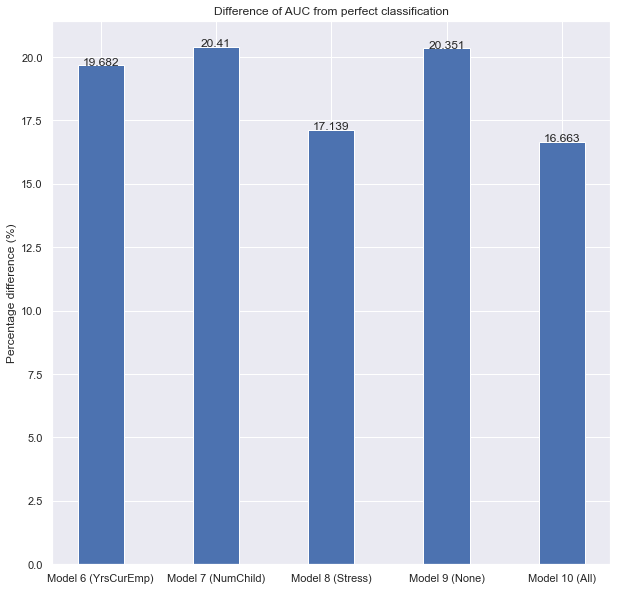

In [169]:
## Percentage difference of AUC from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)']
y_list = [(1-m6_test_auc)*100, (1-m7_test_auc)*100, (1-m8_test_auc)*100, (1-m9_test_auc)*100, (1-m10_test_auc)*100]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of AUC from perfect classification")
plt.show()

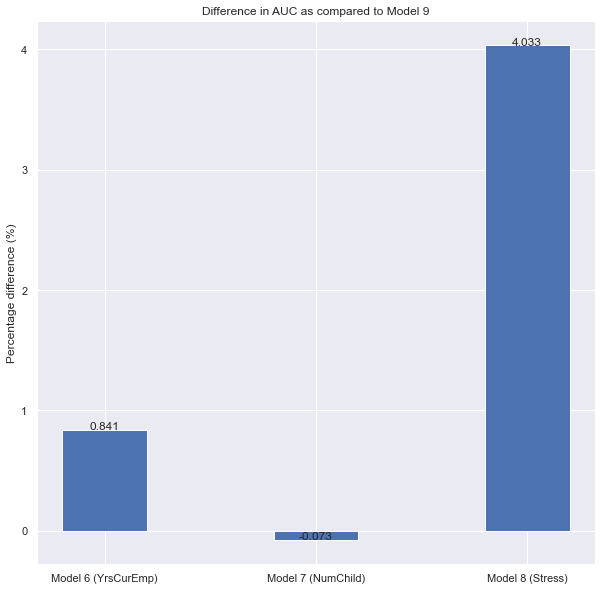

In [170]:
# Difference in AUC

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(10, 10))
x_list = ['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)']
y_list = [((m6_test_auc-m9_test_auc)/m9_test_auc)*100, ((m7_test_auc-m9_test_auc)/m9_test_auc)*100, ((m8_test_auc-m9_test_auc)/m9_test_auc)*100]

plt.bar(x_list, y_list, color ='b',
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference in AUC as compared to Model 9")
plt.show()

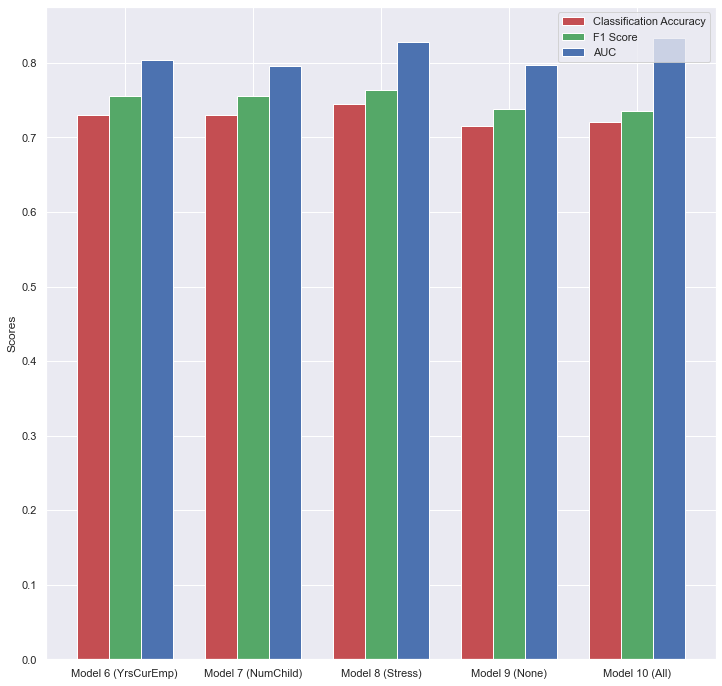

In [91]:
# Classification Accuracy, F1 Score, AUC of the 5 models

ind = np.arange(5) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [m6_test_ca, m7_test_ca, m8_test_ca, m9_test_ca, m10_test_ca]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [m6_test_f1, m7_test_f1, m8_test_f1, m9_test_f1, m10_test_f1]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [m6_test_auc, m7_test_auc, m8_test_auc, m9_test_auc, m10_test_auc]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Scores")
  
plt.xticks(ind+width,['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

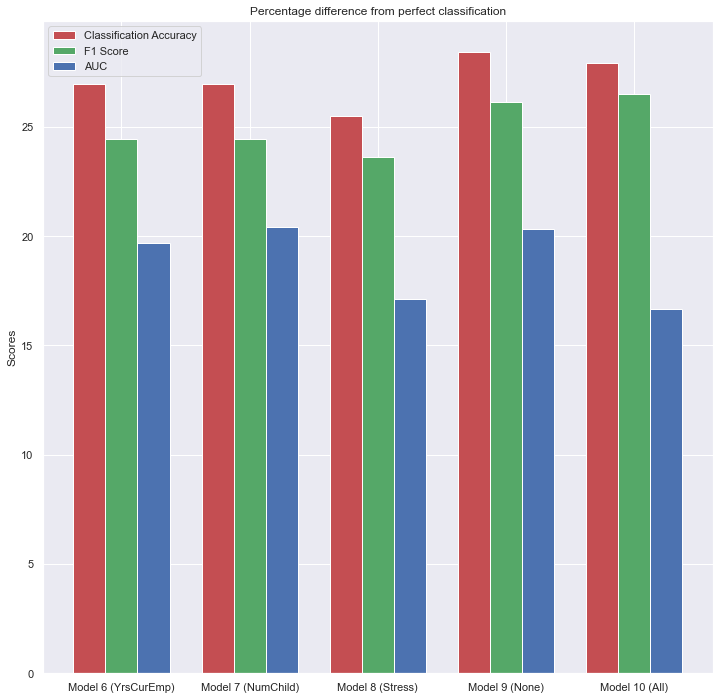

In [92]:
# Percentage difference from perfect classification

ind = np.arange(5) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [(1-m6_test_ca)*100, (1-m7_test_ca)*100, (1-m8_test_ca)*100, (1-m9_test_ca)*100, (1-m10_test_ca)*100]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [(1-m6_test_f1)*100, (1-m7_test_f1)*100, (1-m8_test_f1)*100, (1-m9_test_f1)*100, (1-m10_test_f1)*100]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [(1-m6_test_auc)*100, (1-m7_test_auc)*100, (1-m8_test_auc)*100, (1-m9_test_auc)*100, (1-m10_test_auc)*100]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Scores")
plt.title("Percentage difference from perfect classification")
  
plt.xticks(ind+width,['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)', 'Model 9 (None)', 'Model 10 (All)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

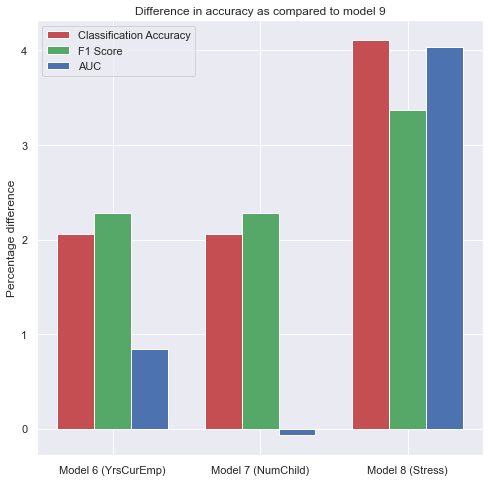

In [93]:
# Difference in Classification Accuracy, F1 Score, AUC as compared to model 4

ind = np.arange(3) 
width = 0.25

fig = plt.figure(figsize=(8, 8))
xvals = [((m6_test_ca-m9_test_ca)/m9_test_ca)*100, ((m7_test_ca-m9_test_ca)/m9_test_ca)*100, ((m8_test_ca-m9_test_ca)/m9_test_ca)*100]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [((m6_test_f1-m9_test_f1)/m9_test_f1)*100, ((m7_test_f1-m9_test_f1)/m9_test_f1)*100, ((m8_test_f1-m9_test_f1)/m9_test_f1)*100]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [((m6_test_auc-m9_test_auc)/m9_test_auc)*100, ((m7_test_auc-m9_test_auc)/m9_test_auc)*100, ((m8_test_auc-m9_test_auc)/m9_test_auc)*100]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Percentage difference")
plt.title("Difference in accuracy as compared to model 9")
  
plt.xticks(ind+width,['Model 6 (YrsCurEmp)', 'Model 7 (NumChild)', 'Model 8 (Stress)'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

### Observations:

Model 8 (Stress) has the highest classification accuracy, F1 score and AUC among all the models. As compared to Model 9 which excludes the top 3 best features, Model 8 has a classification accuracy about 4.1% higher than that of Model 9,  F1 score of about 3.3% higher than that of Model 9 and AUC of about 4% higher than that of Model 9. The classification accuracy and F1 score of Model 8 is also higher than that for Model 10. Model 8 has the highest AUC score among Model 6 to 9 but Model 10 has the highest AUC overall.

### Insights:
The model that includes Stress as a predictor generally performed the best, and even better than Model 10 which included the top 3 variables in terms of classification accuracy and F1 score. This suggests that Stress is a key predictor of employee's intention to leave his or her employer. It also suggests that the inclusion of YrsCurEmp and NumChild as predictors may have resulted in the overfitting of the model to the train set and the test set is best predicted with the inclusion of only Stress, as seen from YrsCurEmp and NumChild being rated higher than Stress in terms of importance of features as determined by RFE, but the model that included Stress performed better than that which included YrsCurEmp, NumChild or both. 


### Comparison of all models

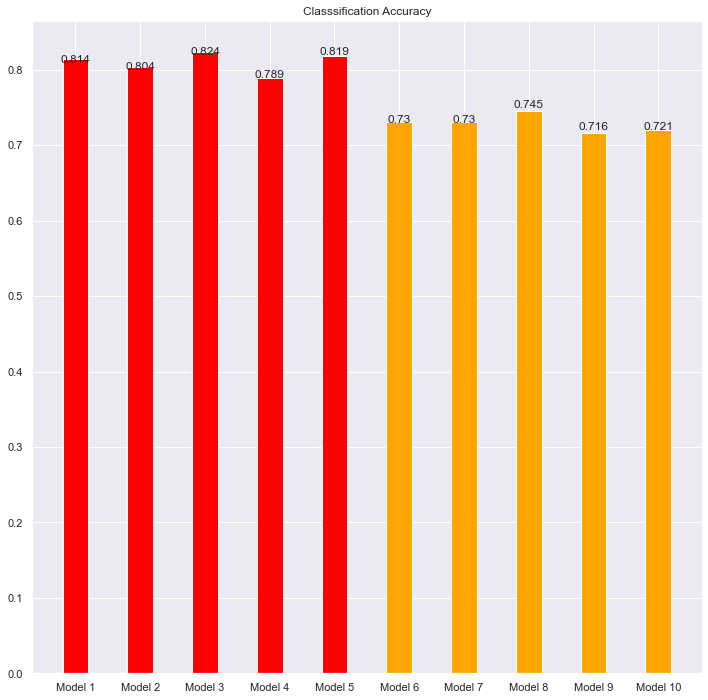

In [148]:
## Classification accuracies of the 10 models 

fig = plt.figure(figsize=(12, 12))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [m1_test_ca, m2_test_ca, m3_test_ca, m4_test_ca, m5_test_ca, m6_test_ca, m7_test_ca, m8_test_ca, m9_test_ca, m10_test_ca]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

addlabels(x_list, y_list)

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)
 
plt.title("Classsification Accuracy")
plt.show()

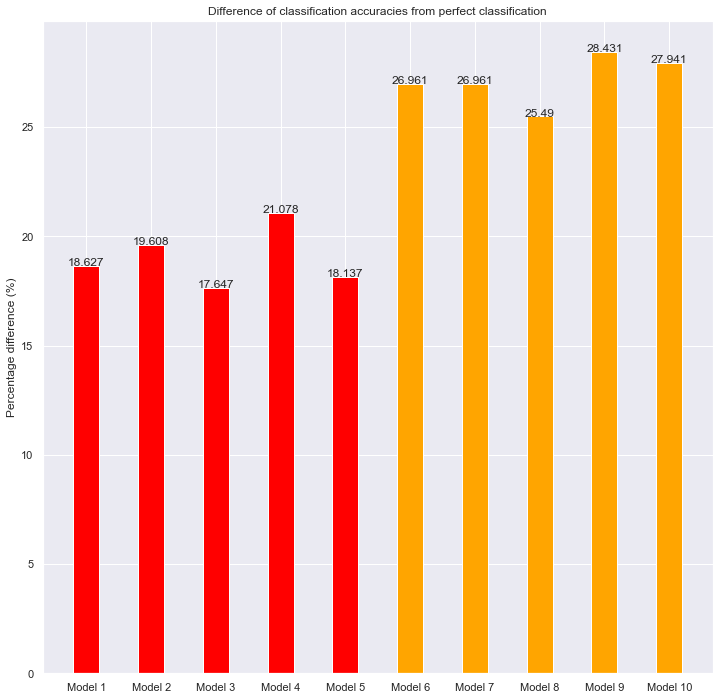

In [172]:
## Percentage difference of classification accuracies from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(12, 12))
x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [(1-m1_test_ca)*100, (1-m2_test_ca)*100, (1-m3_test_ca)*100, (1-m4_test_ca)*100, (1-m5_test_ca)*100, (1-m6_test_ca)*100, (1-m7_test_ca)*100, (1-m8_test_ca)*100, (1-m9_test_ca)*100, (1-m10_test_ca)*100]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)

addlabels(x_list, y_list)
 
plt.ylabel("Percentage difference (%)")
plt.title("Difference of classification accuracies from perfect classification")
plt.show()

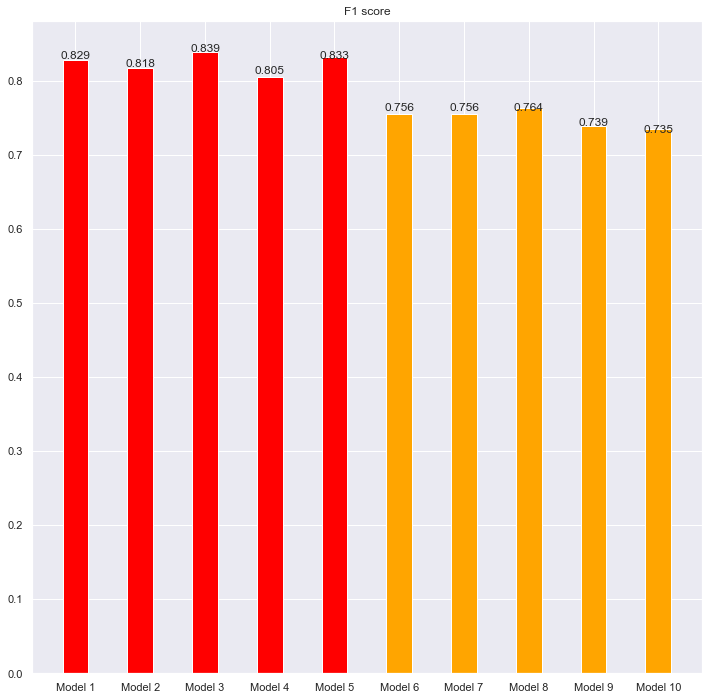

In [150]:
## F1 Score of the 10 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(12, 12))
x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [m1_test_f1, m2_test_f1, m3_test_f1, m4_test_f1, m5_test_f1, m6_test_f1, m7_test_f1, m8_test_f1, m9_test_f1, m10_test_f1]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("F1 score")
plt.show()

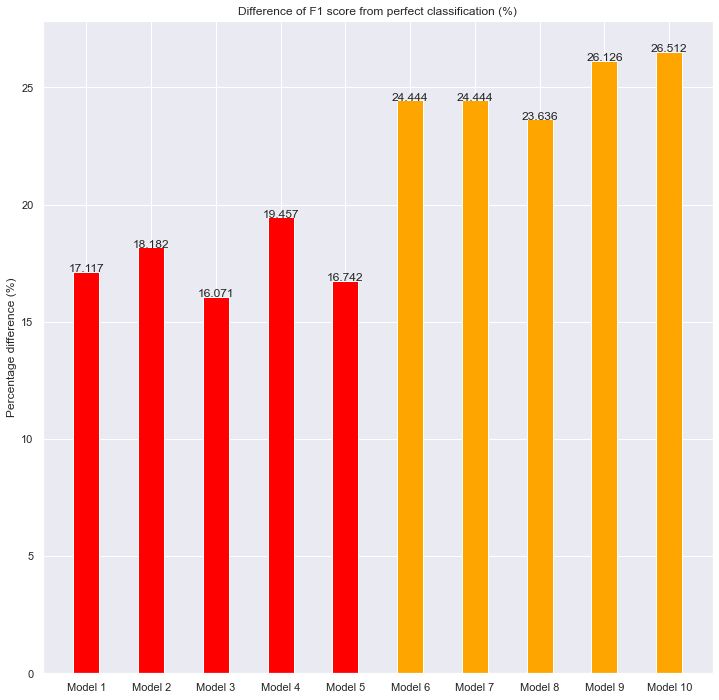

In [171]:
## Percentage difference of F1 Score from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(12, 12))
x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [(1-m1_test_f1)*100, (1-m2_test_f1)*100, (1-m3_test_f1)*100, (1-m4_test_f1)*100, (1-m5_test_f1)*100, (1-m6_test_f1)*100, (1-m7_test_f1)*100, (1-m8_test_f1)*100, (1-m9_test_f1)*100, (1-m10_test_f1)*100]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of F1 score from perfect classification (%)")
plt.show()

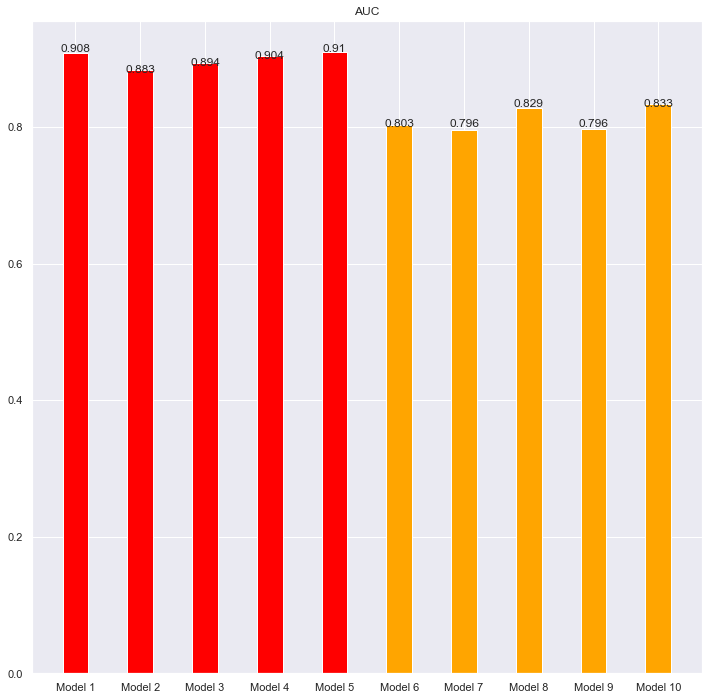

In [152]:
## AUC of the 10 models 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(12, 12))
x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [m1_test_auc, m2_test_auc, m3_test_auc, m4_test_auc, m5_test_auc, m6_test_auc, m7_test_auc, m8_test_auc, m9_test_auc, m10_test_auc]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)

addlabels(x_list, y_list)
 
plt.title("AUC")
plt.show()

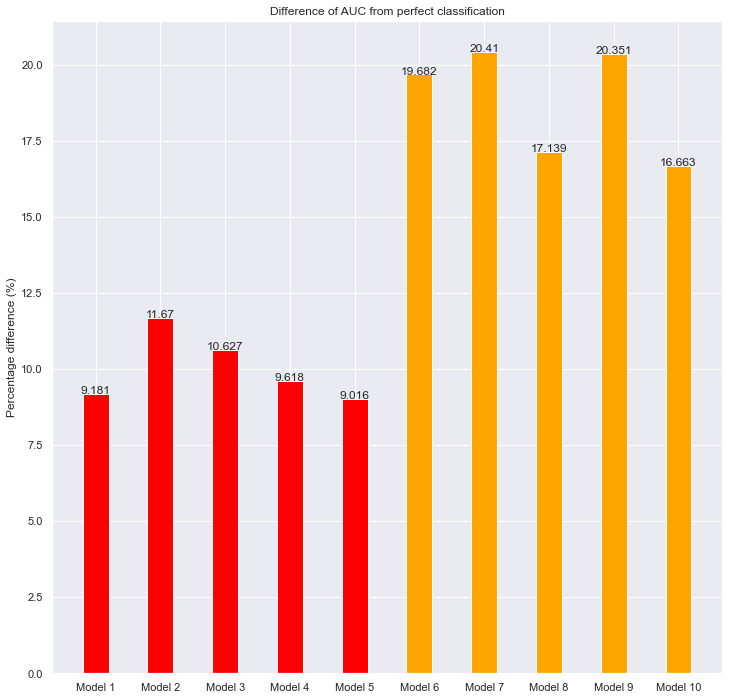

In [174]:
## Percentage difference of AUC from perfect classification

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 3), ha = 'center')

fig = plt.figure(figsize=(12, 12))
x_list = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10']
y_list = [(1-m1_test_auc)*100, (1-m2_test_auc)*100, (1-m3_test_auc)*100, (1-m4_test_auc)*100, (1-m5_test_auc)*100, (1-m6_test_auc)*100, (1-m7_test_auc)*100, (1-m8_test_auc)*100, (1-m9_test_auc)*100, (1-m10_test_auc)*100]
c_list = ['red', 'red', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'orange']

plt.bar(x_list, y_list, color = c_list,
        width = 0.4)

addlabels(x_list, y_list)

plt.ylabel("Percentage difference (%)")
plt.title("Difference of AUC from perfect classification")
plt.show()

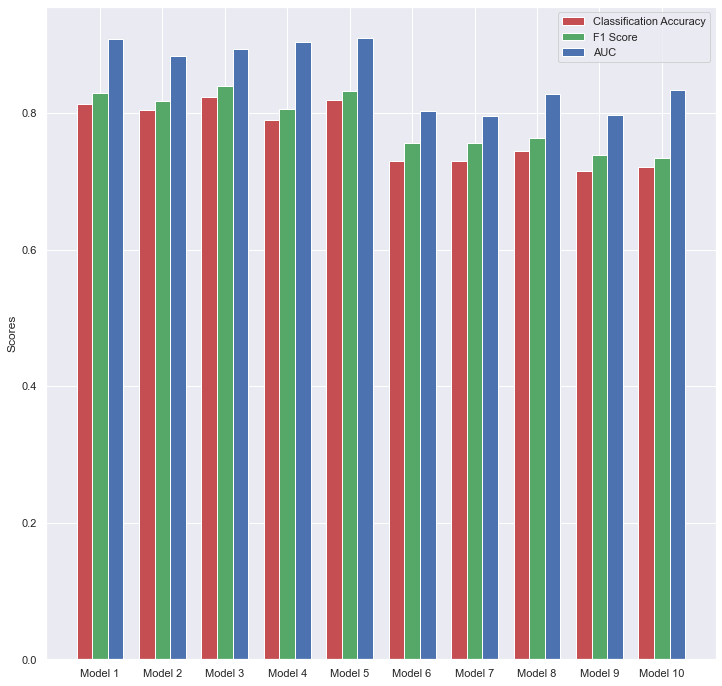

In [155]:
# Classification Accuracy, F1 Score, AUC of the 10 models

ind = np.arange(10) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [m1_test_ca, m2_test_ca, m3_test_ca, m4_test_ca, m5_test_ca, m6_test_ca, m7_test_ca, m8_test_ca, m9_test_ca, m10_test_ca]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [m1_test_f1, m2_test_f1, m3_test_f1, m4_test_f1, m5_test_f1, m6_test_f1, m7_test_f1, m8_test_f1, m9_test_f1, m10_test_f1]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [m1_test_auc, m2_test_auc, m3_test_auc, m4_test_auc, m5_test_auc, m6_test_auc, m7_test_auc, m8_test_auc, m9_test_auc, m10_test_auc]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Scores")
  
plt.xticks(ind+width,['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

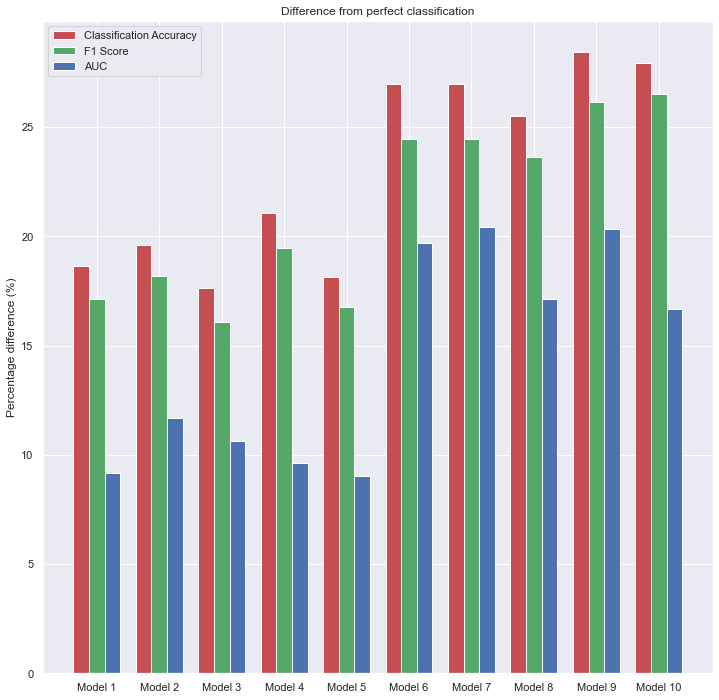

In [176]:
## Percentage difference from perfect classification

ind = np.arange(10) 
width = 0.25

fig = plt.figure(figsize=(12, 12))
xvals = [(1-m1_test_ca)*100, (1-m2_test_ca)*100, (1-m3_test_ca)*100, (1-m4_test_ca)*100, (1-m5_test_ca)*100, (1-m6_test_ca)*100, (1-m7_test_ca)*100, (1-m8_test_ca)*100, (1-m9_test_ca)*100, (1-m10_test_ca)*100]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [(1-m1_test_f1)*100, (1-m2_test_f1)*100, (1-m3_test_f1)*100, (1-m4_test_f1)*100, (1-m5_test_f1)*100, (1-m6_test_f1)*100, (1-m7_test_f1)*100, (1-m8_test_f1)*100, (1-m9_test_f1)*100, (1-m10_test_f1)*100]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [(1-m1_test_auc)*100, (1-m2_test_auc)*100, (1-m3_test_auc)*100, (1-m4_test_auc)*100, (1-m5_test_auc)*100, (1-m6_test_auc)*100, (1-m7_test_auc)*100, (1-m8_test_auc)*100, (1-m9_test_auc)*100, (1-m10_test_auc)*100]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.ylabel("Percentage difference (%)")
plt.title("Difference from perfect classification")
  
plt.xticks(ind+width,['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10'])
plt.legend( (bar1, bar2, bar3), ('Classification Accuracy', 'F1 Score', 'AUC') )
plt.show()

### Observations:

The models (Model 1-5) that used the Random Forest Tree classifier have higher accuracy than the models (Model 6-10) that used Logistic Regression classifier in terms of classification accuracy, F1 score and AUC. 

The classification accuracy of the models that used Random Forest classifier falls between the range of 0.78 to 0.82 while that of models that used Logistic Regression falls between the range of 0.71 to 0.74. 

The F1 score of the models that used Random Forest classifier falls between the range of 0.8 and 0.84 while that of models that used Logistic Regression falls between the range of 0.74 to 0.76. 

The AUC score of the models that used Random Forest classifier falls between the range of 0.88 and 0.91 while that of models that used Logistic Regression falls between the range of 0.8 and 0.83. 


### Insights: 

Random Forest Tree classifer (n_estimators=100, max_depth=10) generally has a higher accuracy than Logistic Regression classifier (max_iter=1000), with an average of about 0.07 difference in terms of classification accuracy, F1 score and AUC. The difference in accuracy between the different types of classifier used is larger than between the different predictor variables included, hence the classifier used is a larger determinant of the accuracy of the model as compared to the predictor variables used. 